In [100]:
import pandas as pd
pd.options.display.max_columns = 100
import numpy as np
import openmatrix as omx
import os
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
import seaborn as sns
sns.set(font_scale=1.5)

In [101]:
def read_matrix_from_omx_file(file, core, row_map="zone_number", col_map="zone_number"):
    if type(file) == str:
        file = omx.open_file(file)
        
    matrix_df = pd.DataFrame(file[core][:])
    if row_map is not None:
        inv_row_map = file.mapping(row_map)
        row_map = {taz1: taz2 for taz2, taz1 in inv_row_map.items()}
        inv_col_map = file.mapping(col_map)
        col_map = {taz1: taz2 for taz2, taz1 in inv_col_map.items()}
    else:
        row_map = {i: i+1 for i in range(len(matrix_df))}
        col_map = {i: i+1 for i in range(len(matrix_df))}
    matrix_df.rename(index=row_map, columns=col_map, inplace=True)
    return matrix_df

In [102]:
output_dir = r'C:\ABM3_dev\output_2z_100per'

In [103]:
households = pd.read_csv(os.path.join(output_dir, 'final_households.csv'))
persons = pd.read_csv(os.path.join(output_dir, 'final_persons.csv'))
tours = pd.read_csv(os.path.join(output_dir, 'final_tours.csv'))
trips = pd.read_csv(os.path.join(output_dir, 'final_trips.csv'))
landuse = pd.read_csv(os.path.join(output_dir, 'final_land_use.csv'))

C:\Users\davidh\AppData\Local\Temp\17\ipykernel_265684\2432087234.py:3: DtypeWarning: Columns (15,16,20) have mixed types. Specify dtype option on import or set low_memory=False.
  tours = pd.read_csv(os.path.join(output_dir, 'final_tours.csv'))
C:\Users\davidh\AppData\Local\Temp\17\ipykernel_265684\2432087234.py:4: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  trips = pd.read_csv(os.path.join(output_dir, 'final_trips.csv'))


In [105]:
md_skims.list_mappings()

['zone_number']

In [106]:
md_skims = omx.open_file(r'C:\ABM3_dev\2zone_data\traffic_skims_processed_MD.omx')
sov_md_dist = read_matrix_from_omx_file(md_skims, 'SOV_TR_M_DIST__MD', 'zone_number', 'zone_number')
sov_md_dist = sov_md_dist.melt(ignore_index=False).reset_index()
sov_md_dist.columns = ['origin', 'destination', 'dist']

In [107]:
sov_md_dist.head()

,origin,destination,dist
0,1,1,0.787847
1,2,1,11.893787
2,3,1,13.119427
3,4,1,38.945305
4,5,1,66.265656


In [108]:
households

,household_id,home_zone_id,income,hhsize,HHT,auto_ownership,num_workers,bldgsz,sample_rate,income_in_thousands,income_segment,num_non_workers,num_drivers,num_adults,num_children,num_young_children,num_children_6_to_12,num_children_5_to_15,num_children_16_to_17,num_gradeschool,num_highschool,num_college_age,num_young_adults,num_predrive_child,num_nonworker_adults,num_university_students,num_fullTime_workers,num_partTime_workers,num_retired_adults,num_highschool_graduates,num_children_6_to_15,num_young_retirees,num_old_retirees,non_family,family,home_is_urban,home_is_rural,num_hh_in_zone,hh_work_auto_savings_ratio,transponder_ownership,has_joint_tour,num_under16_not_at_school,num_travel_active,num_travel_active_adults,num_travel_active_preschoolers,num_travel_active_children,num_travel_active_non_preschoolers,participates_in_jtf_model,school_escorting_outbound,school_escorting_inbound,...,mstallssam,mparkcost,parkactive,openspaceparkpreserve,beachactive,budgetroom,economyroom,luxuryroom,midpriceroom,upscaleroom,hotelroomtotal,truckregiontype,district27,milestocoast,acres,effective_acres,land_acres,MicroAccessTime,remoteAVParking,refueling_stations,totint,duden,empden,popden,retempden,totintbin,empdenbin,dudenbin,PopEmpDenPerMi,poe_id,original_MAZ,external_TAZ,external_MAZ,external_size_term_placeholder,colonia_pop_accessibility,external_work,external_nonwork,ML_DIST,AVGTTS,PCTDETOUR,household_density,population_density,employment_density,density_index,is_cbd,tot_collegeenroll,preschool_target,is_parking_zone,joint_tour_frequency_composition,num_hh_joint_tours
0,1,47,294757,2,1,3,1,2,1,294.757,4,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2,0,2,0,False,True,False,False,22,0.0,False,0,0,2,2,0,0,2,True,1,1,...,0,0,0.0000,0.0000,0.0,0,0,0,0,0,0,1,27,4.0331,5.4086,5.4086,5.4086,10,0,0,135,4.1677,1.4876,9.3726,0.3679,3,1,1,6950.5262,-1,-1,-1,-1,0,NaN,0.0,0.0,8.3927,0.04958,0.0,4.067596,8.689864,0.000000,0.000000,False,0,47,True,7.0,1
1,2,10,210480,2,1,2,1,2,1,210.480,4,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2,0,1,1,False,True,False,False,15,0.0,False,0,0,1,1,0,0,1,False,1,1,...,0,0,0.0000,0.0000,0.0,0,0,0,0,0,0,1,27,3.8413,3.9444,3.9444,3.9444,10,0,0,150,3.5699,1.5420,8.3515,0.9934,3,1,1,6331.8568,-1,-1,-1,-1,0,NaN,0.0,0.0,8.1725,0.05121,0.0,3.802860,9.126863,0.000000,0.000000,False,0,36,True,0.0,0
2,3,16,236389,2,3,1,0,2,1,236.389,4,2,1,1,1,0,1,1,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,False,True,False,False,56,0.0,False,0,0,2,1,0,1,2,True,3,3,...,0,0,0.2885,2.6246,0.0,0,0,0,0,0,0,1,27,4.1787,12.9617,12.9617,12.9617,10,0,0,163,4.5000,2.3031,9.9589,0.3880,3,1,1,7847.7009,-1,-1,-1,-1,0,NaN,0.0,0.0,8.3927,0.04958,0.0,4.320421,9.643797,0.308601,0.288028,False,0,128,True,15.0,1
3,4,27,121977,2,2,2,2,2,1,121.977,4,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,0,1,0,False,True,False,False,42,0.0,False,1,0,2,2,0,0,2,True,1,1,...,0,0,0.0000,0.9152,0.0,0,0,0,0,0,0,1,27,3.5366,13.5213,13.3853,13.5213,10,0,0,86,2.2541,12.5055,5.2245,5.8081,2,2,1,11347.2370,-1,-1,-1,-1,0,NaN,0.0,0.0,8.2293,0.05137,0.0,3.106210,7.099909,0.073957,0.072237,False,0,96,True,7.0,1
4,5,3,104512,2,7,3,2,2,1,104.512,4,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,True,False,False,False,52,0.0,False,0,0,2,2,0,0,2,True,1,1,...,0,1,0.0000,14.5405,0.0,0,0,0,0,0,0,1,27,4.1939,27.8451,26.8679,27.8451,10,0,0,122,3.8058,1.4096,8.8477,0.2349,2,1,1,6564.6648,-1,-1,-1,-1,0,NaN,0.0,0.0,7.9313,0.05147,0.0,1.867474,3.986339,0.179565,0.163814,False,0,115,True,13.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197121,1197122,15300,14000,1,0,1,1,9,1,14.000,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,False,False,False,False,10137,0.0,False,0,0,0,0,0,0,0,False,

## Household Variables

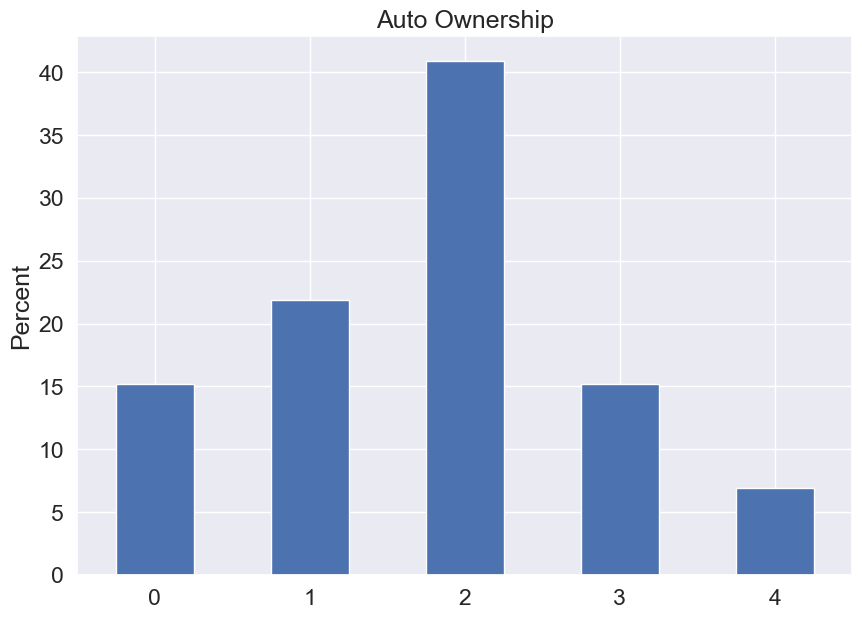

In [134]:
plt.figure(figsize=(10,7))
(households.auto_ownership.value_counts(normalize=True) * 100).loc[[0,1,2,3,4]].plot(kind='bar')
plt.title('Auto Ownership')
plt.ylabel('Percent')
plt.xticks(rotation=0)
plt.show()

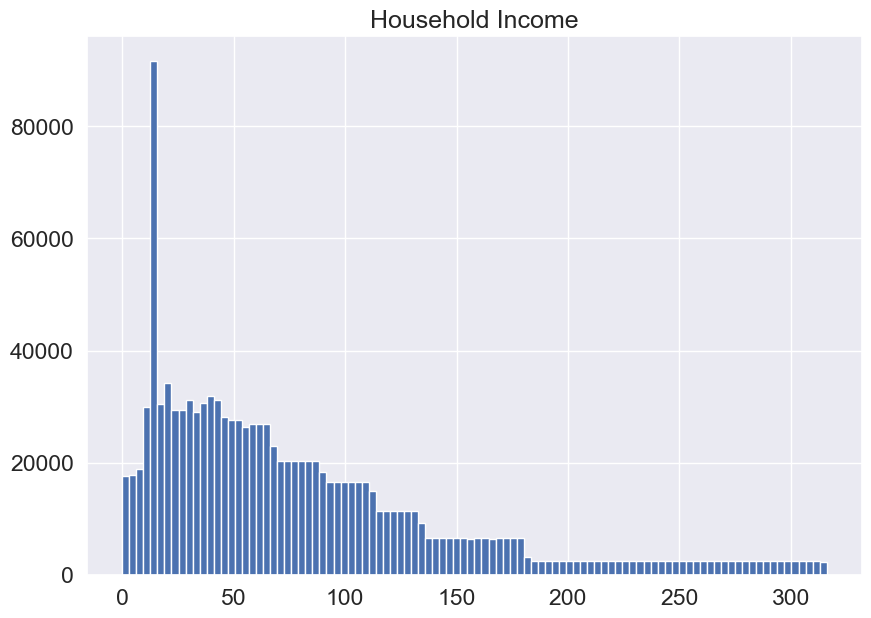

In [110]:
plt.figure(figsize=(10,7))
households.income_in_thousands.hist(bins=100)
plt.title('Household Income')
plt.show()

In [111]:
households.income_in_thousands.value_counts()

14.000     62280
124.090      338
101.898      326
158.056      326
248.632      324
           ...  
5.367          1
14.303         1
119.894        1
227.526        1
166.569        1
Name: income_in_thousands, Length: 202839, dtype: int64

Lots of households have an annual income of exactly $14,000

## Person Variables

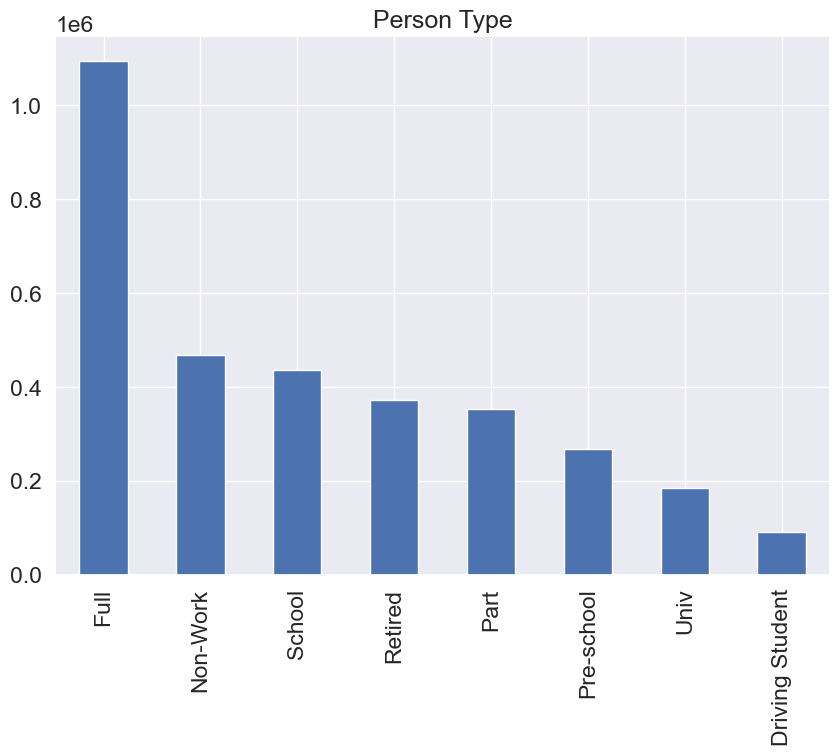

In [112]:
person_type_dict = {
    1: 'Full',
    2: 'Part',
    3: 'Univ',
    4: 'Non-Work',
    5: 'Retired',
    6: 'Driving Student',
    7: 'School',
    8: 'Pre-school'
}
persons['ptype_named'] = persons['ptype'].map(person_type_dict)

plt.figure(figsize=(10,7))
persons.ptype_named.value_counts().plot(kind='bar')
plt.title('Person Type')
plt.show()

## Purpose

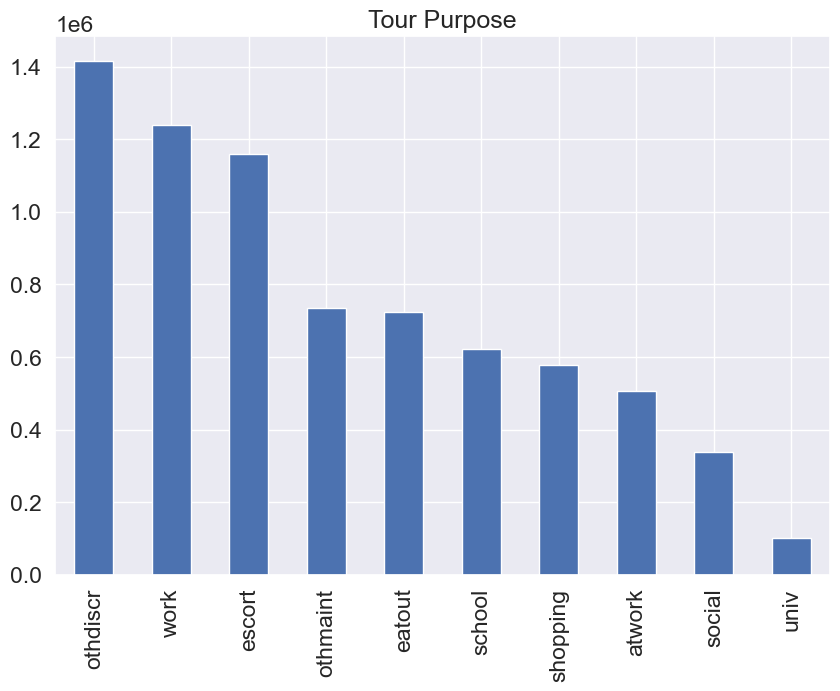

In [113]:
plt.figure(figsize=(10,7))
tours.primary_purpose.value_counts().plot(kind='bar')
plt.title('Tour Purpose')
plt.show()

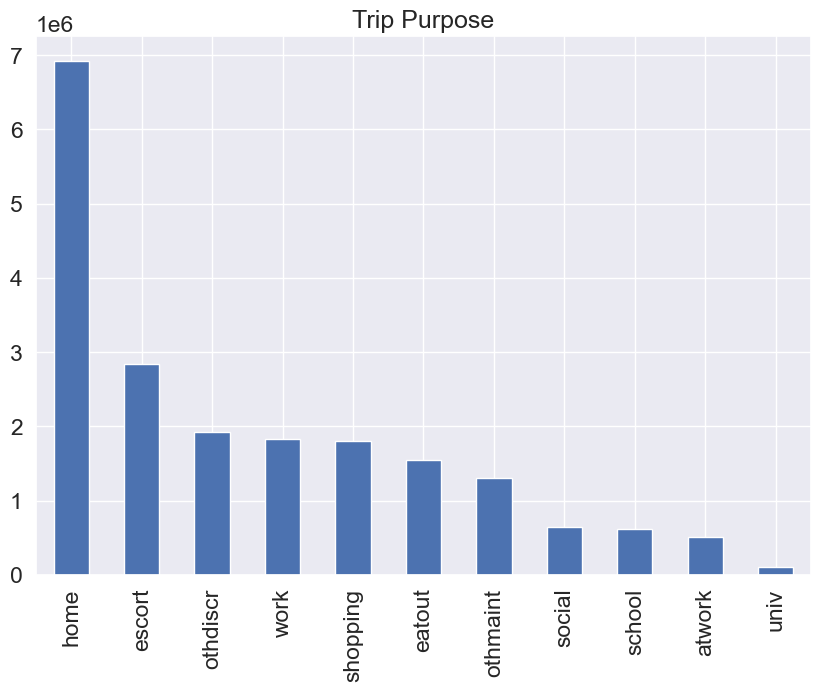

In [114]:
plt.figure(figsize=(10,7))
trips.purpose.value_counts().plot(kind='bar')
plt.title('Trip Purpose')
plt.show()

## Mode

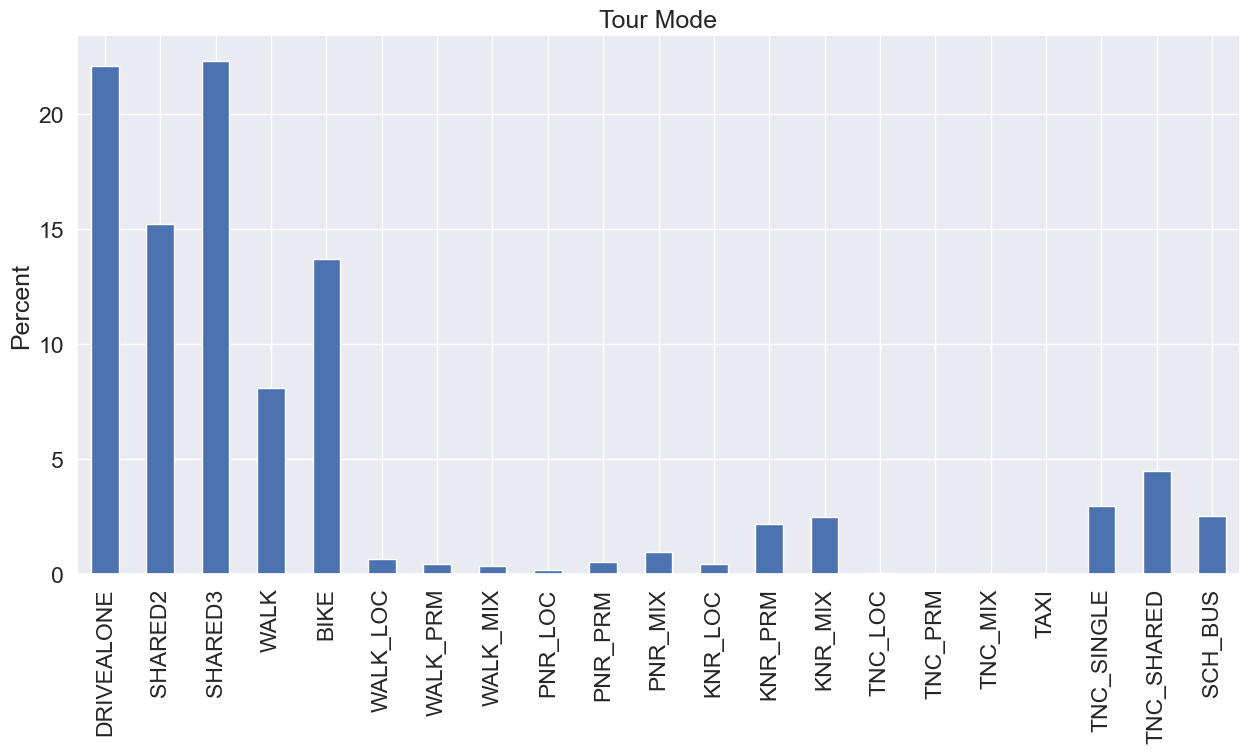

In [133]:
mode_order = ['DRIVEALONE','SHARED2','SHARED3','WALK','BIKE','WALK_LOC', 'WALK_PRM', 'WALK_MIX','PNR_LOC', 'PNR_PRM', 'PNR_MIX','KNR_LOC', 'KNR_PRM', 'KNR_MIX','TNC_LOC', 'TNC_PRM', 'TNC_MIX','TAXI','TNC_SINGLE','TNC_SHARED','SCH_BUS']
tour_modes = tours.tour_mode.value_counts(normalize=True) * 100
missing_modes = [mode for mode in mode_order if mode not in tour_modes.index]
for missing_mode in missing_modes:
    tour_modes.loc[missing_mode] = 0

plt.figure(figsize=(15,7))
tour_modes.loc[mode_order].plot(kind='bar')
plt.title('Tour Mode')
plt.ylabel('Percent')
plt.show()

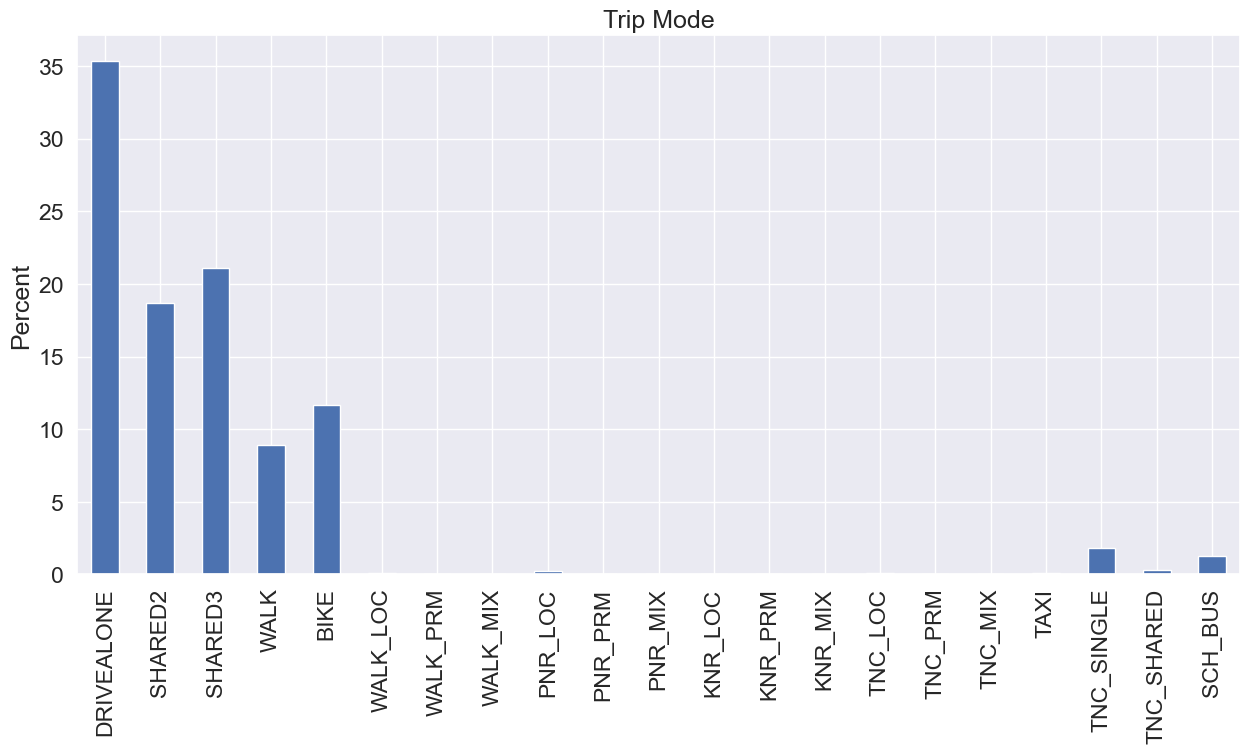

In [132]:
trip_modes = trips.trip_mode.value_counts(normalize=True) * 100
missing_modes = [mode for mode in mode_order if mode not in trip_modes.index]
for missing_mode in missing_modes:
    trip_modes.loc[missing_mode] = 0

plt.figure(figsize=(15,7))
trip_modes.loc[mode_order].plot(kind='bar')
plt.title('Trip Mode')
plt.ylabel('Percent')
plt.show()

In [117]:
trip_modes

DRIVEALONE    7083530
SHARED3       4224501
SHARED2       3750294
BIKE          2333261
WALK          1790041
TNC_SINGLE     363685
SCH_BUS        253547
TNC_SHARED      61972
PNR_LOC         47175
TAXI            21600
TNC_LOC         17564
WALK_LOC        15184
TNC_PRM         12739
KNR_LOC         12060
KNR_PRM         11783
TNC_MIX         10333
PNR_PRM          9612
PNR_MIX          8415
KNR_MIX          8028
WALK_PRM         7293
WALK_MIX         4605
Name: trip_mode, dtype: int64

## Scheduling

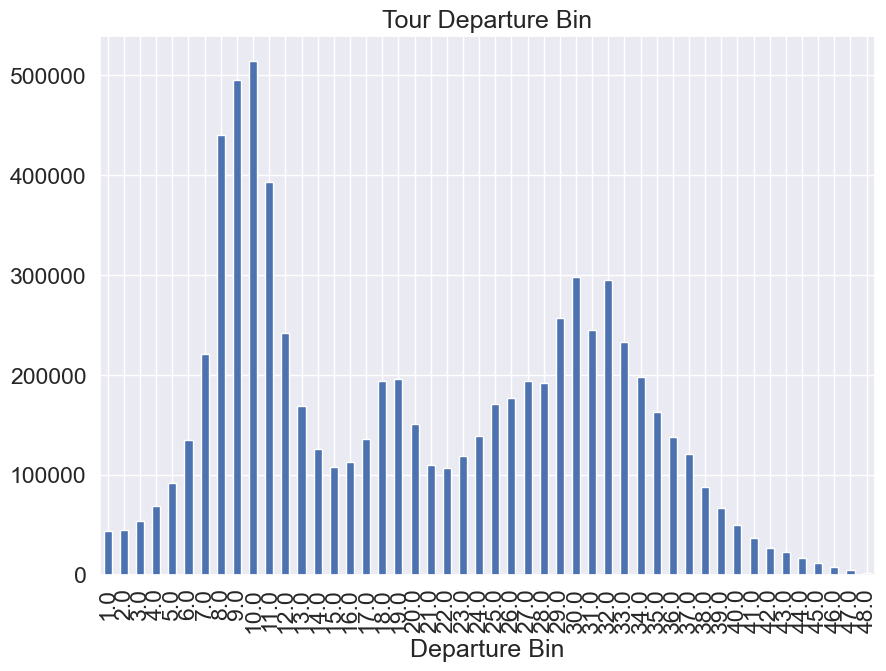

In [118]:
plt.figure(figsize=(10,7))
tours.start.value_counts().loc[range(1,49)].plot(kind='bar')
plt.title('Tour Departure Bin')
plt.xlabel('Departure Bin')
plt.show()

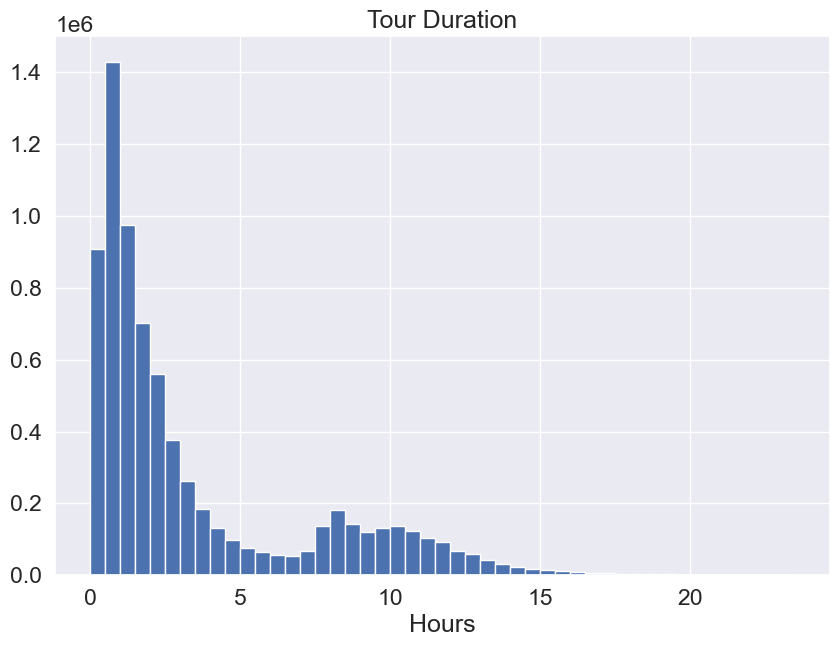

In [119]:
plt.figure(figsize=(10,7))
(tours.duration / 2).hist(bins=47)
plt.title('Tour Duration')
plt.xlabel('Hours')
plt.show()

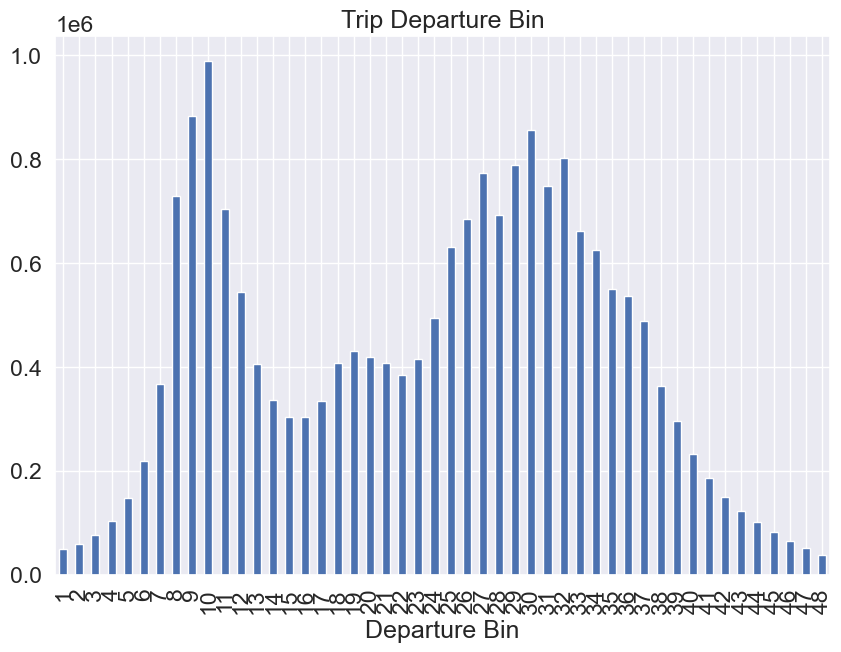

In [120]:
plt.figure(figsize=(10,7))
trips.depart.value_counts().loc[range(1,49)].plot(kind='bar')
plt.title('Trip Departure Bin')
plt.xlabel('Departure Bin')
plt.show()

## Location Choice

In [121]:
maz_taz_xwalk = landuse.set_index('zone_id')['TAZ'].to_dict()
tours['origin_taz'] = tours['origin'].map(maz_taz_xwalk)
tours['destination_taz'] = tours['destination'].map(maz_taz_xwalk)

trips['origin_taz'] = trips['origin'].map(maz_taz_xwalk)
trips['destination_taz'] = trips['destination'].map(maz_taz_xwalk)

tours_with_dist = pd.merge(tours, sov_md_dist, how='left', left_on=['origin_taz', 'destination_taz'], right_on=['origin', 'destination'])
trips_with_dist = pd.merge(trips, sov_md_dist, how='left', left_on=['origin_taz', 'destination_taz'], right_on=['origin', 'destination'])

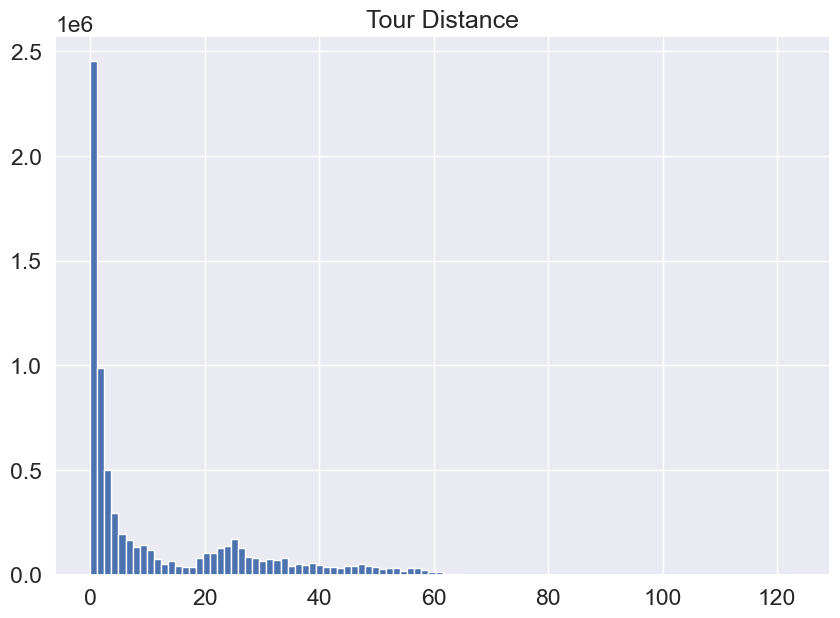

In [122]:
plt.figure(figsize=(10,7))
tours_with_dist.dist.hist(bins=100)
plt.title('Tour Distance')
plt.show()

In [123]:
tours_with_dist[tours_with_dist.dist > 80].primary_purpose.value_counts()

school      2655
othdiscr    1339
escort       732
social       414
othmaint     403
eatout       336
shopping     279
work          80
atwork        18
univ           1
Name: primary_purpose, dtype: int64

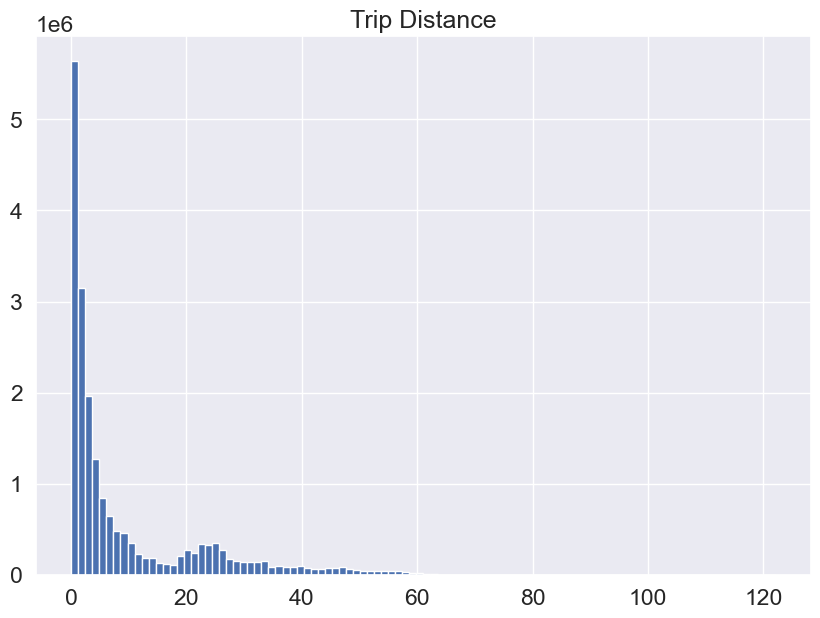

In [124]:
plt.figure(figsize=(10,7))
trips_with_dist.dist.hist(bins=100)
plt.title('Trip Distance')
plt.show()

In [125]:
trips_with_dist[trips_with_dist.dist > 80].purpose.value_counts()

home        3057
othdiscr    1142
school       864
escort       528
othmaint     381
eatout       334
shopping     281
social       219
work          65
atwork        16
Name: purpose, dtype: int64

Some school tours and trips are very long!!

## Timing

In [126]:
timing_log = pd.read_csv(os.path.join(output_dir, 'log', 'timing_log.csv'))

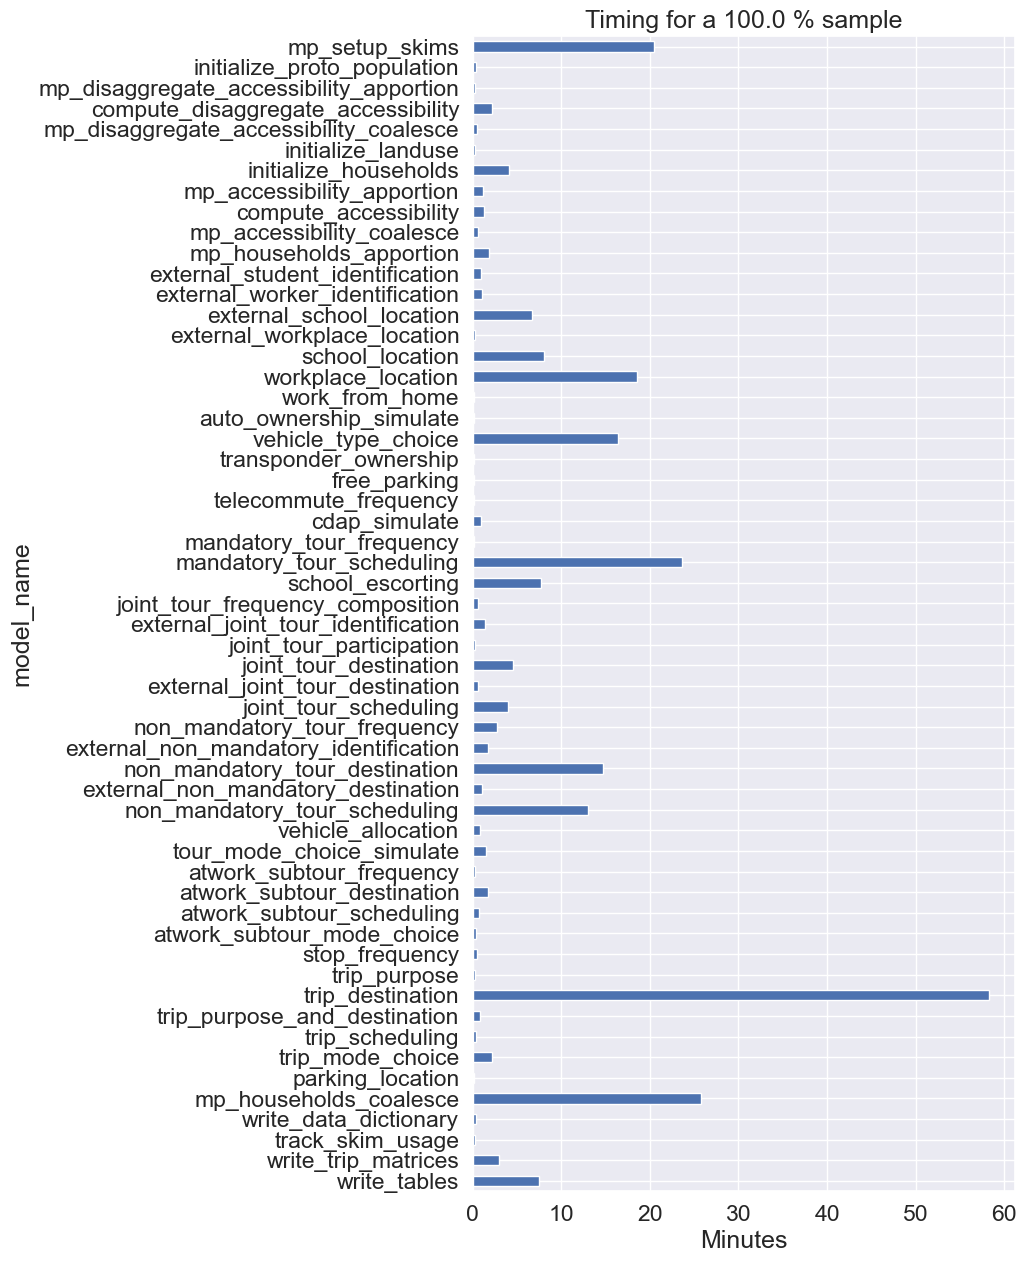

Total model run time: 268.09999999999997 minutes = 4.468333333333333 hours


In [127]:
plt.show()
order = timing_log.loc[timing_log.index.sort_values(ascending=False),'model_name'].values
plt.figure(figsize=(7,15))
timing_log.set_index('model_name').loc[order].minutes.plot.barh()
plt.xlabel('Minutes')
plt.title(f'Timing for a {round(households.sample_rate.mean()*100, 1)} % sample')
plt.show()
print(f"Total model run time: {timing_log.minutes.sum()} minutes = {timing_log.minutes.sum() / 60} hours")

While timing log says run took only 84 mins, the anaconda prompt has a time of 124.6 mins to complete....

## Trip Purpose and Destination
What is the profile of failed trips?

In [128]:
trips

,trip_id,person_id,household_id,primary_purpose,trip_num,outbound,trip_count,destination,origin,tour_id,escort_participants,school_escort_direction,purpose,destination_logsum,depart,trip_mode,mode_choice_logsum,vot_da,vot_s2,vot_s3,parking_zone,origin_taz,destination_taz
0,505,1,1,eatout,1,True,1,133.0,47,63,NaN,NaN,eatout,NaN,27,DRIVEALONE,-0.194167,2.184011,1.092005,0.728004,-1,3458,3565
1,509,1,1,eatout,1,False,1,47.0,133,63,NaN,NaN,home,NaN,29,DRIVEALONE,-0.218043,2.184011,1.092005,0.728004,-1,3565,3458
2,1001,2,1,othdiscr,1,True,1,63.0,47,125,NaN,NaN,othdiscr,NaN,14,DRIVEALONE,0.865395,2.052309,1.026155,0.684103,-1,3458,3458
3,1005,2,1,othdiscr,1,False,1,47.0,63,125,NaN,NaN,home,NaN,17,DRIVEALONE,0.865395,2.052309,1.026155,0.684103,-1,3458,3458
4,1401,3,2,othdiscr,1,True,1,3058.0,10,175,NaN,NaN,othdiscr,NaN,33,DRIVEALONE,0.477506,5.224801,2.612401,1.741600,-1,3407,3330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20047217,1306195589,3265488,1197126,work,1,False,2,15300.0,23011,163274448,NaN,NaN,shopping,2.582305,30,DRIVEALONE,-2.534645,2.497254,1.248627,0.832418,-1,12,15
20047218,1306195590,3265488,1197126,work,2,False,2,15300.0,15300,163274448,NaN,NaN,home,NaN,32,DRIVEALONE,-0.802780,2.497254,1.248627,0.832418,-1,15,15
20047219,1306195593,3265488,1197126,work,1,True,1,23011.0,15300,163274449,NaN,NaN,work,NaN,33,DRIVEALONE,-2.514664,2.497254,1.248627,0.832418,-1,15,12
20047220,1306195597,3265488,1197126,work,1,False,2,15300.0,23011,163274449,NaN,NaN,escort,8.270086,35,DRIVEALONE,-2.534645,2.497254,1.248627,0.832418,-1,12,15


In [129]:
failed_trips = pd.read_csv(os.path.join(output_dir, 'trip_purpose_and_destination_i5_failed_trips.csv'))

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\ABM3_dev\\output_2z_100per\\trip_purpose_and_destination_i5_failed_trips.csv'

In [ ]:
failed_trips = pd.merge(failed_trips, tours, how='left', on='tour_id', suffixes=('', '_tour'))

In [ ]:
failed_trips.tour_mode.value_counts()

In [ ]:
failed_trips.origin.value_counts()

In [ ]:
landuse[landuse.zone_id.isin(failed_trips.origin)]